Do `Kernel -> Restart & Run All` in top menu to run the notebook and enable the interactive widgets

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.signal import square
from ipywidgets import widgets
import pdb

In [3]:
def square_wave(x, width, height, period):
    return height * (square(2*pi*(1/period)*(x+width/2),width/period)+1)/2

def sinc(x):
    return np.sinc(x / pi)

def spectrum_square_wave(k, width, height, period):
    omega = 2*pi / period
    return height * (width/period) * sinc(width/2 * k * omega)

## Time-domain signal

<IPython.core.display.Javascript object>


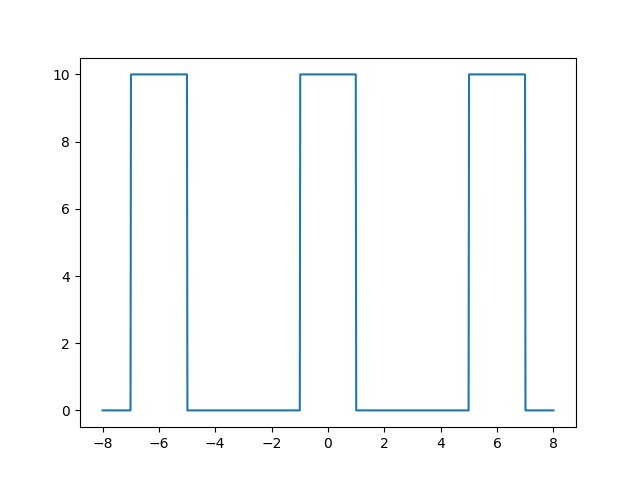

In [4]:
x_axis = np.linspace(-8,8,1000)
width = 2
height = 10
period = 6

sq = square_wave(x_axis, width, height, period)
plt.plot(x_axis,sq)
plt.show()

# Spectrum

<IPython.core.display.Javascript object>


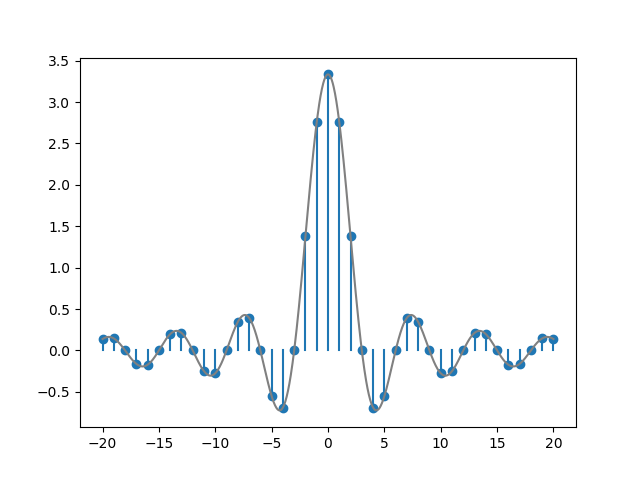

In [5]:
n_k = 20
k = np.arange(-n_k,n_k+1)
k_cont = np.linspace(-n_k,n_k,1000)

omega = 2*pi / period
c_k = height * (width/period) * np.sinc(width/2 * k * omega / pi)
c_k_cont = height * (width/period) * np.sinc(width/2 * k_cont * omega / pi)

plt.figure()
plt.stem(k,c_k, basefmt=' ')
plt.plot(k_cont, c_k_cont, '0.5')
plt.show()

In [6]:
def set_stem_plot(handle, x, y):
    ml, sl, _ = handle
    ml.set_data(x, y)
    for i_l, l in enumerate(sl[:x.shape[0]]):
        l.set_data(np.stack((x,x)).T[i_l], 
                   np.stack((np.zeros(x.shape), y)).T[i_l])
    del sl[x.shape[0]:]

## Step-by-step reconstruction of time-domain signal

<IPython.core.display.Javascript object>


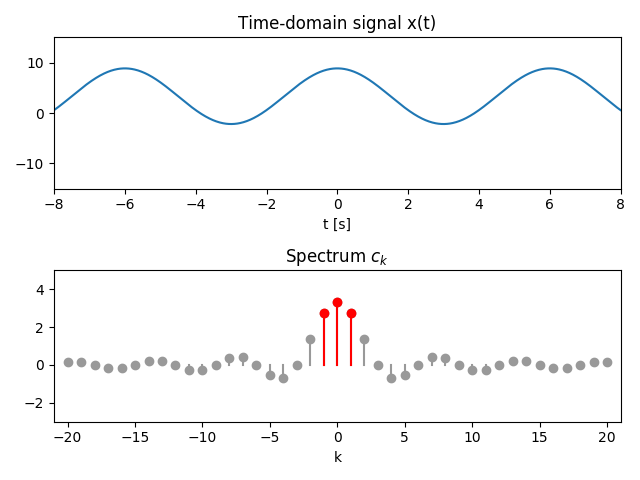

<function __main__.plot_square_wave>

In [7]:
x_axis = np.linspace(-8,8,1000)
k_lim = 20
k_axis = np.arange(-k_lim,k_lim+1)

w = 2  # width of a rectangle
h = 1 # height of rectangles
p = 6  # period
squeeze = 1
 
# setting up the plots
fig, ax = plt.subplots(2,1)
ax[0].set_xlim([-8,8])
ax[0].set_ylim([-15,15])
ax[0].set_xlabel('t [s]')
ax[0].set_title('Time-domain signal x(t)')
ax[1].set_xlim([-k_lim-1,k_lim+1])
ax[1].set_ylim([-3,5])
ax[1].set_xlabel('k')
ax[1].set_title('Spectrum $c_k$')
sig_plot, = ax[0].plot([],[])
spec_zeros = np.zeros(k_axis.shape)
spec_plot_gr = ax[1].stem(k_axis, spec_zeros, basefmt = ' ')
spec_plot_red = ax[1].stem(k_axis, spec_zeros, basefmt = ' ')
plt.setp(spec_plot_gr[0], 'color', '0.6')
plt.setp(spec_plot_gr[1], 'color', '0.6')

plt.tight_layout()

# wrapper for interactive mode
def plot_square_wave(n_coef = 2):
    global spec_plot_red
    delay = 0
    height = 10
    sq_wav = height * square_wave(squeeze*x_axis-delay,w,h,p)
    
    # positive part of spectrum
    c_k_pos = c_k[n_k:]
    
    # summing cosines corresponding to n_coef coefficient from the spectrum
    summed = np.zeros(x_axis.shape)
    for k in range(n_coef):
        mult = 2 if (k != 0) else 1 # cosine has 2x amplitude of the coefficient in the spectrum
        summed += mult * np.abs(c_k_pos[k]) * np.cos(k*omega*x_axis + np.angle(c_k_pos[k]))
        
    # spectrum
    spec_sq_wav = spectrum_square_wave(k_axis/squeeze,w,height,p)
    
    sig_plot.set_data(x_axis, summed)
    set_stem_plot(spec_plot_gr, k_axis, spec_sq_wav)
    k_axis_chosen = k_axis[-n_coef + 1 + k_lim: n_coef + k_lim]
    spec_sq_wav_chosen = spec_sq_wav[-n_coef + 1 + k_lim: n_coef + k_lim]
    
    # this is ugly, but the interactive stem plots are hell
    try:
        spec_plot_red.remove()
    except ValueError:
        pass
    
    if n_coef > 0:
        spec_plot_red = ax[1].stem(k_axis_chosen, spec_sq_wav_chosen, basefmt = ' ')
    plt.setp(spec_plot_red[0], 'color', 'red')
    plt.setp(spec_plot_red[1], 'color', 'red')
    plt.draw()
    
widgets.interact(plot_square_wave, 
                 n_coef = (0,k_lim+1,1))
